In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from bs4 import BeautifulSoup
import string,unicodedata
from sklearn.feature_extraction.text import CountVectorizer
from plotly.subplots import make_subplots
import plotly.graph_objects as go


In [45]:
df = pd.read_csv("/content/Yemen war Reddit Scrape.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,body,category,communityName,createdAt,dataType,flair,html,id,isAd,isVideo,...,postId,scrapedAt,thumbnailUrl,title,upVoteRatio,upVotes,url,userId,username,videoUrl
0,URL: https://v.redd.it/8zkhzbxomddc1\nThumbnai...,NaN,r/TheDeprogram,2024-01-19T10:48:15.000Z,post,Art,NaN,t3_19agds1,False,True,...,NaN,2024-06-18T15:31:02.815Z,nsfw,"Yemen war song ""Never to America"" with Anti im...",0.97,603,https://www.reddit.com/r/TheDeprogram/comments...,t2_5184213v,CleverSpaceWombat,https://v.redd.it/8zkhzbxomddc1/DASH_720.mp4?s...
1,"[☭☭☭ COME SHITPOST WITH US ON DISCORD, COMRADE...",TheDeprogram,r/TheDeprogram,2024-01-19T10:48:40.000Z,comment,NaN,"&lt;div class=""md""&gt;&lt;p&gt;&lt;a href=""htt...",t1_kiklcjh,NaN,NaN,...,t3_19agds1,2024-06-18T15:31:02.842Z,NaN,NaN,NaN,1,https://www.reddit.com/r/TheDeprogram/comments...,t2_6l4z3,AutoModerator,NaN
2,Incredibly based + unironic banger,TheDeprogram,r/TheDeprogram,2024-01-19T11:49:14.000Z,comment,NaN,"&lt;div class=""md""&gt;&lt;p&gt;Incredibly base...",t1_kikqtzw,NaN,NaN,...,t3_19agds1,2024-06-18T15:31:02.842Z,NaN,NaN,NaN,136,https://www.reddit.com/r/TheDeprogram/comments...,t2_om755s8a,HexeInExile,NaN
3,Like half of the video is just support for the...,TheDeprogram,r/TheDeprogram,2024-01-19T16:18:24.000Z,comment,NaN,"&lt;div class=""md""&gt;&lt;p&gt;Like half of th...",t1_kilt7d5,NaN,NaN,...,t3_19agds1,2024-06-18T15:31:02.842Z,NaN,NaN,NaN,37,https://www.reddit.com/r/TheDeprogram/comments...,t2_qxypw,justyourbarber,NaN
4,I think that video get take down in youtube,TheDeprogram,r/TheDeprogram,2024-01-19T11:43:46.000Z,comment,NaN,"&lt;div class=""md""&gt;&lt;p&gt;I think that vi...",t1_kikqaxb,NaN,NaN,...,t3_19agds1,2024-06-18T15:31:02.842Z,NaN,NaN,NaN,75,https://www.reddit.com/r/TheDeprogram/comments...,t2_8qj5j4q4s,Chad_VietnamSoldier,NaN


Data Processing

In [47]:
df = df.iloc[:, :1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,body
0,URL: https://v.redd.it/8zkhzbxomddc1\nThumbnai...
1,"[☭☭☭ COME SHITPOST WITH US ON DISCORD, COMRADE..."
2,Incredibly based + unironic banger
3,Like half of the video is just support for the...
4,I think that video get take down in youtube


In [49]:
#Handling missing values
df = df.dropna()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,body
0,URL: https://v.redd.it/8zkhzbxomddc1\nThumbnai...
1,"[☭☭☭ COME SHITPOST WITH US ON DISCORD, COMRADE..."
2,Incredibly based + unironic banger
3,Like half of the video is just support for the...
4,I think that video get take down in youtube


In [51]:
mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot",
           "'cause": "because", "could've": "could have", "couldn't": "could not",
           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not",
           "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will",
           "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will",
           "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will",
           "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have",
           "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have",
           "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not",
           "might've": "might have","mightn't": "might not","mightn't've": "might not have",
           "must've": "must have", "mustn't": "must not", "mustn't've": "must not have",
           "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
           "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would",
           "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have",
           "she's": "she is", "should've": "should have", "shouldn't": "should not",
           "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is",
           "that'd": "that would", "that'd've": "that would have", "that's": "that is",
           "there'd": "there would", "there'd've": "there would have", "there's": "there is",
           "here's": "here is","they'd": "they would", "they'd've": "they would have",
           "they'll": "they will", "they'll've": "they will have", "they're": "they are",
           "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would",
           "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have",
           "we're": "we are", "we've": "we have", "weren't": "were not",
           "what'll": "what will", "what'll've": "what will have","what're": "what are",
           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have",
           "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will",
           "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is",
           "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have",
           "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have",
           "y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
           "you're": "you are", "you've": "you have" }

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
# Function to remove HTMl tags
def remove_html_tags(text):
  soup=BeautifulSoup(text, "html.parser")
  return soup.get_text()

# Assuming Processed Reddit is the column with HTML content
df['Clean body'] = df['body'].apply(remove_html_tags)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-52-34f7a9b0340c>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup=BeautifulSoup(text, "html.parser")
<ipython-input-52-34f7a9b0340c>:3: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup=BeautifulSoup(text, "html.parser")


In [53]:
# Remove URLs and Special characters with Regular Expressions
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URL
    text = re.sub(r'\S*@\S*\s?', '', text)  # Remove mailboxes
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")]) #expanding chatwords and contracts clearing contractions
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_clean.sub(r'',text)
    return text

df['Clean body'] = df['Clean body'].apply(clean_text)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
df['Clean body']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0                     URL \nThumbnail nsfw\nImages\n\t\n
1       COME SHITPOST WITH US ON DISCORD COMRADES \n\...
2                      Incredibly based  unironic banger
3      Like half of the video is just support for the...
4            I think that video get take down in youtube
                             ...                        
495    Im not a don supporter at all Im just not a ha...
496    Every US president would react the same way Ho...
497              Let me know when he does something good
498                                     remindme 4 years
499                                          \n\nTry 400
Name: Clean body, Length: 500, dtype: object

In [55]:
# Text preprocessing using NLTK or spaCy: word splitting, deletion of stop words, word shape reduction
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download the necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [56]:
stopwords = nltk.corpus.stopwords.words('english')
Clean_text = [word for word in df if word.lower() not in stopwords]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
lemmatizer = WordNetLemmatizer()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
# of pre-processed text
def preprocess_text(df):
    text = df.lower()
    words = df.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords]
    return ' '.join(words)

df['Processed body'] = df['Clean body'].apply(preprocess_text)
df['Processed body']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0                              URL Thumbnail nsfw Images
1      COME SHITPOST WITH US ON DISCORD COMRADES This...
2                       Incredibly based unironic banger
3      Like half video support Cuban revolution China...
4                         I think video get take youtube
                             ...                        
495    Im supporter Im hater like everyone I like fac...
496    Every US president would react way However Tru...
497                              Let know something good
498                                      remindme 4 year
499                                              Try 400
Name: Processed body, Length: 500, dtype: object

In [59]:
df.to_csv('Processed_dataset_withsentiment.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Keyword Extraction

In [60]:
# Extract keywords using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['Processed body'])
tfidf

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<500x969 sparse matrix of type '<class 'numpy.float64'>'
	with 4577 stored elements in Compressed Sparse Row format>

In [61]:
# Convert to array and get feature names (vocabulary)
feature_array = tfidf_vectorizer.get_feature_names_out()
tfidf_sorting = tfidf.toarray().argsort()[:, ::-1]

# Get the first N keywords of each document
n = 3
top_n_keywords = feature_array[tfidf_sorting][:,:n]
top_n_keywords

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([['url', 'thumbnail', 'images'],
       ['rule', 'check', 'new'],
       ['banger', 'incredibly', 'unironic'],
       ...,
       ['let', 'good', 'know'],
       ['year', 'zionist', 'foundation'],
       ['try', 'zionist', 'game']], dtype=object)

Sentiment Analysis

In [62]:
nltk.download('vader_lexicon')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [63]:
# Sentiment analysis using VADER
sid = SentimentIntensityAnalyzer()
df['Sentiments'] = df['Processed body'].apply(lambda x: sid.polarity_scores(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
df['Sentiments']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1      {'neg': 0.045, 'neu': 0.779, 'pos': 0.177, 'co...
2      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3      {'neg': 0.198, 'neu': 0.355, 'pos': 0.447, 'co...
4      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
                             ...                        
495    {'neg': 0.353, 'neu': 0.431, 'pos': 0.216, 'co...
496    {'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'comp...
497    {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp...
498    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
499    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: Sentiments, Length: 500, dtype: object

In [65]:
# VADER Sentiment analysis categorisation
def classify_sentiment_vader(scores):
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['VADER Sentiment'] = df['Sentiments'].apply(classify_sentiment_vader)
df['VADER Sentiment']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0       neutral
1      positive
2       neutral
3      positive
4       neutral
         ...   
495    negative
496    negative
497    positive
498     neutral
499     neutral
Name: VADER Sentiment, Length: 500, dtype: object

In [66]:
# Sentiment analysis using TextBlob (alternative)
df['TextBlob Sentiment'] = df['Processed body'].apply(lambda x: TextBlob(x).sentiment.polarity)
def classify_sentiment_textblob(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

df['TextBlob Sentiment Category'] = df['TextBlob Sentiment'].apply(classify_sentiment_textblob)
df['TextBlob Sentiment Category']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0       neutral
1      positive
2      positive
3      positive
4       neutral
         ...   
495    negative
496    negative
497    positive
498     neutral
499     neutral
Name: TextBlob Sentiment Category, Length: 500, dtype: object

In [67]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,body,Clean body,Processed body,Sentiments,VADER Sentiment,TextBlob Sentiment,TextBlob Sentiment Category
0,URL: https://v.redd.it/8zkhzbxomddc1\nThumbnai...,URL \nThumbnail nsfw\nImages\n\t\n,URL Thumbnail nsfw Images,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,0.000000,neutral
1,"[☭☭☭ COME SHITPOST WITH US ON DISCORD, COMRADE...",COME SHITPOST WITH US ON DISCORD COMRADES \n\...,COME SHITPOST WITH US ON DISCORD COMRADES This...,"{'neg': 0.045, 'neu': 0.779, 'pos': 0.177, 'co...",positive,0.212121,positive
2,Incredibly based + unironic banger,Incredibly based unironic banger,Incredibly based unironic banger,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,0.900000,positive
3,Like half of the video is just support for the...,Like half of the video is just support for the...,Like half video support Cuban revolution China...,"{'neg': 0.198, 'neu': 0.355, 'pos': 0.447, 'co...",positive,0.116667,positive
4,I think that video get take down in youtube,I think that video get take down in youtube,I think video get take youtube,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,0.000000,neutral


In [68]:
df.to_csv('Processed_dataset_withsentiment.csv', index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic Modeling

In [69]:
nltk.download('punkt')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [70]:
from collections import defaultdict
texts = [word_tokenize(doc) for doc in df['Processed body'] if word_tokenize(doc)]
# Remove very low-frequency words
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [[token for token in text if frequency[token] > 1] for text in texts]

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

ldamodel = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
topics = ldamodel.print_topics(num_words=2)
for topic in topics:
    print(topic)

(0, '0.021*"dont" + 0.018*"Trump"')
(1, '0.027*"I" + 0.015*"The"')
(2, '0.027*"deleted" + 0.021*"Yemen"')
(3, '0.031*"I" + 0.015*"US"')
(4, '0.018*"US" + 0.013*"American"')
(5, '0.019*"people" + 0.012*"war"')
(6, '0.039*"I" + 0.013*"ally"')
(7, '0.013*"genocide" + 0.012*"year"')
(8, '0.028*"people" + 0.018*"war"')
(9, '0.050*"I" + 0.020*"Im"')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
topics = ldamodel.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.021*"dont" + 0.018*"Trump" + 0.018*"I" + 0.015*"What" + 0.014*"think"')
(1, '0.027*"I" + 0.015*"The" + 0.013*"Trump" + 0.011*"day" + 0.010*"one"')
(2, '0.027*"deleted" + 0.021*"Yemen" + 0.021*"Trump" + 0.013*"US" + 0.012*"I"')
(3, '0.031*"I" + 0.015*"US" + 0.014*"people" + 0.013*"The" + 0.013*"Yemen"')
(4, '0.018*"US" + 0.013*"American" + 0.012*"And" + 0.012*"one" + 0.010*"brave"')
(5, '0.019*"people" + 0.012*"war" + 0.012*"country" + 0.011*"I" + 0.011*"Thats"')
(6, '0.039*"I" + 0.013*"ally" + 0.013*"dont" + 0.013*"Yemen" + 0.012*"American"')
(7, '0.013*"genocide" + 0.012*"year" + 0.012*"like" + 0.011*"Palestine" + 0.011*"Trump"')
(8, '0.028*"people" + 0.018*"war" + 0.015*"I" + 0.012*"want" + 0.012*"know"')
(9, '0.050*"I" + 0.020*"Im" + 0.015*"people" + 0.014*"dont" + 0.013*"want"')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [73]:
pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
# Lets visualize the topics
import pyLDAvis
from pyLDAvis.gensim import prepare

pyLDAvis.enable_notebook()
vis = prepare(ldamodel, corpus, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.001341 -0.015277       1        1  15.465884
6      0.099936 -0.074541       2        1  13.212503
2     -0.189721 -0.011552       3        1  11.273204
8     -0.001411 -0.027304       4        1  11.024352
1     -0.060880  0.018878       5        1  10.271176
4      0.012865  0.168709       6        1   9.926865
9      0.050740 -0.081724       7        1   8.282965
5      0.058692  0.042481       8        1   6.919408
0     -0.028449 -0.079558       9        1   6.844063
7      0.059569  0.059890      10        1   6.779578, topic_info=        Term        Freq       Total Category  logprob  loglift
438  deleted   21.000000   21.000000  Default  30.0000  30.0000
166       Im   28.000000   28.000000  Default  29.0000  29.0000
4          I  155.000000  155.000000  Default  28.0000  28.0000
89      dont   48.000000   48.000000  Default  27.0000  27.0000
181   people   72.000000   72.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
51   support    2.916777   24.648329  Topic10  -5.0478   0.5570
212     cant    2.692290   17.816509  Topic10  -5.1279   0.8015
74      They    2.612547   27.005215  Topic10  -5.1580   0.3556
4          I    2.527117  155.742714  Topic10  -5.1912  -1.4299
873       He    2.526139   12.745898  Topic10  -5.1916   1.0727

[638 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1040      5  0.787493       2
632       3  0.704857       3
632       4  0.234952       3
786       4  0.709623     3rd
786       6  0.236541     3rd
...     ...       ...     ...
227       4  0.184520   youre
227       5  0.092260   youre
227       7  0.092260   youre
227       9  0.461300   youre
970       3  0.784451  الساعة

[1337 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 7, 3, 9, 2, 5, 10, 6, 1, 8])

In [75]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,body,Clean body,Processed body,Sentiments,VADER Sentiment,TextBlob Sentiment,TextBlob Sentiment Category
0,URL: https://v.redd.it/8zkhzbxomddc1\nThumbnai...,URL \nThumbnail nsfw\nImages\n\t\n,URL Thumbnail nsfw Images,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,0.000000,neutral
1,"[☭☭☭ COME SHITPOST WITH US ON DISCORD, COMRADE...",COME SHITPOST WITH US ON DISCORD COMRADES \n\...,COME SHITPOST WITH US ON DISCORD COMRADES This...,"{'neg': 0.045, 'neu': 0.779, 'pos': 0.177, 'co...",positive,0.212121,positive
2,Incredibly based + unironic banger,Incredibly based unironic banger,Incredibly based unironic banger,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,0.900000,positive
3,Like half of the video is just support for the...,Like half of the video is just support for the...,Like half video support Cuban revolution China...,"{'neg': 0.198, 'neu': 0.355, 'pos': 0.447, 'co...",positive,0.116667,positive
4,I think that video get take down in youtube,I think that video get take down in youtube,I think video get take youtube,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,0.000000,neutral


In [80]:
len(df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


498

In [81]:
df.drop(df.tail(2).index,
        inplace = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [82]:
# Assume you already have a DataFrame containing documents, their most relevant topics, and sentiment scores
# We can get the most likely topic for each document through the LDA model
document_topics = [ldamodel[corpus[i]] for i in range(len(df))]
df['Dominant_Topic'] = [sorted(topics, key=lambda x: -x[1])[0][0] for topics in document_topics]

df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,body,Clean body,Processed body,Sentiments,VADER Sentiment,TextBlob Sentiment,TextBlob Sentiment Category,Dominant_Topic
0,URL: https://v.redd.it/8zkhzbxomddc1\nThumbnai...,URL \nThumbnail nsfw\nImages\n\t\n,URL Thumbnail nsfw Images,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,0.000000,neutral,7
1,"[☭☭☭ COME SHITPOST WITH US ON DISCORD, COMRADE...",COME SHITPOST WITH US ON DISCORD COMRADES \n\...,COME SHITPOST WITH US ON DISCORD COMRADES This...,"{'neg': 0.045, 'neu': 0.779, 'pos': 0.177, 'co...",positive,0.212121,positive,3
2,Incredibly based + unironic banger,Incredibly based unironic banger,Incredibly based unironic banger,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,0.900000,positive,8
3,Like half of the video is just support for the...,Like half of the video is just support for the...,Like half video support Cuban revolution China...,"{'neg': 0.198, 'neu': 0.355, 'pos': 0.447, 'co...",positive,0.116667,positive,2
4,I think that video get take down in youtube,I think that video get take down in youtube,I think video get take youtube,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,0.000000,neutral,3


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


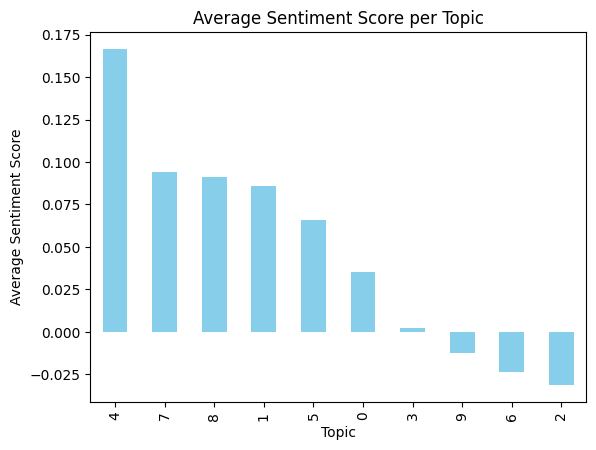

In [83]:
# Next, we calculate the average sentiment score for each topic
# Suppose we already have a column 'Sentiment_Score' in our DataFrame, representing the sentiment score
topic_sentiment = df.groupby('Dominant_Topic')['TextBlob Sentiment'].mean().sort_values(ascending=False)

# Visualize the average sentiment score for each topic
topic_sentiment.plot(kind='bar', color='skyblue')
plt.title('Average Sentiment Score per Topic')
plt.xlabel('Topic')
plt.ylabel('Average Sentiment Score')
plt.show()

N-gram

In [84]:
def get_top_ngram(corpus, n):
    lis=[]
    vec = CountVectorizer(ngram_range = (n,n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0)
    for word,idx in vec.vocabulary_.items():
        lis.append((word, sum_words[0,idx]))
    lis.sort(key = lambda x: x[1], reverse = True)
    return lis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: title={'center': 'Top 20 frequently occured uni-gram'}>

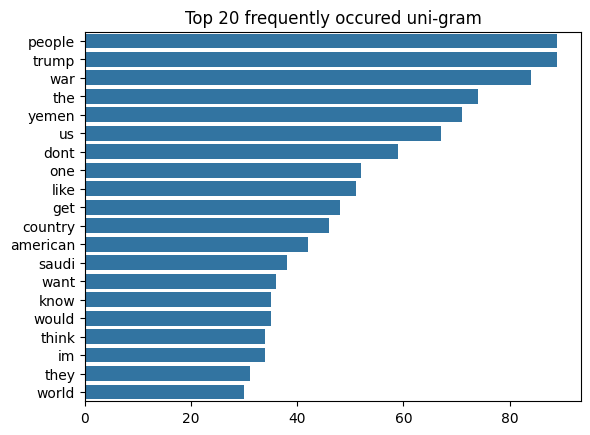

In [85]:
top_n_bigrams=get_top_ngram(df['Processed body'],1)[:20]
x,y=map(list,zip(*top_n_bigrams))
plt.title('Top 20 frequently occured uni-gram')
sns.barplot(x=y,y=x)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: title={'center': 'Top 20 frequently occured bi-grams'}>

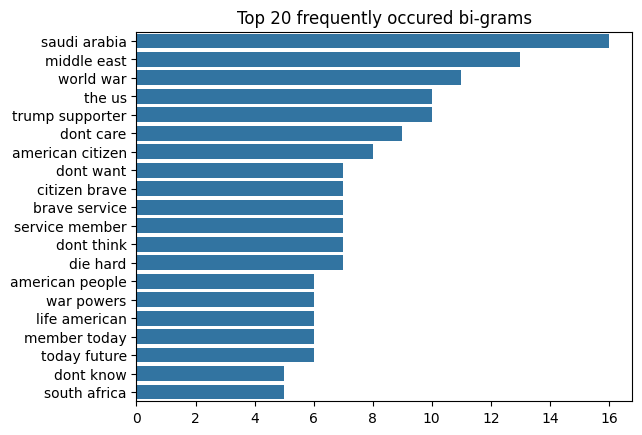

In [86]:
top_n_bigrams=get_top_ngram(df['Processed body'],2)[:20]
x,y=map(list,zip(*top_n_bigrams))
plt.title('Top 20 frequently occured bi-grams')
sns.barplot(x=y,y=x)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: title={'center': 'Top 20 frequently occured tri-grams'}>

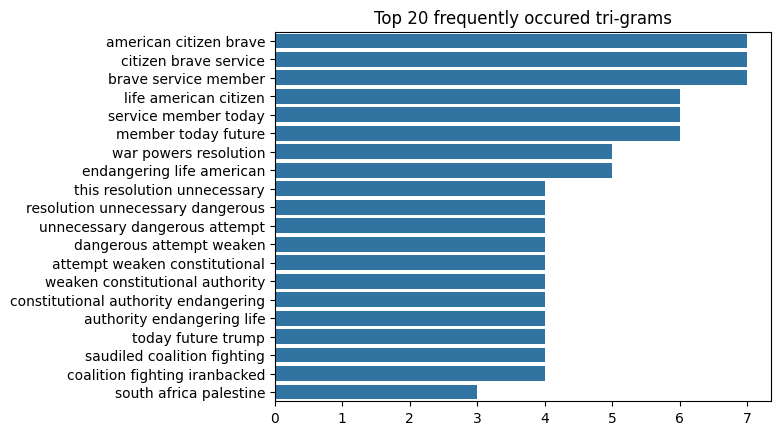

In [87]:
top_n_bigrams=get_top_ngram(df['Processed body'],3)[:20]
x,y=map(list,zip(*top_n_bigrams))
plt.title('Top 20 frequently occured tri-grams')
sns.barplot(x=y,y=x)

Visualisation

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


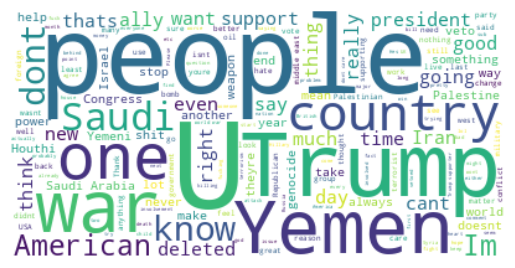

In [88]:
# WordCloud
text = ' '.join(review for review in df['Processed body'])
wordcloud = WordCloud(background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()